# Weekly Project 2!

## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [113]:
import pandas as pd
import numpy as np
import sklearn
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [114]:
df = pd.read_csv('/content/Dataset/RTA_Dataset.csv')

In [115]:
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [117]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [118]:
df.sample(5)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
4281,14:27:00,Friday,Over 51,Male,Junior high school,Employee,Above 10yr,NaN,Owner,2-5yrs,...,U-Turn,na,na,na,na,Driver,Normal,Not a Pedestrian,Changing lane to the left,Slight Injury
4010,16:00:00,Sunday,Under 18,Male,Junior high school,Employee,Below 1yr,Automobile,Owner,NaN,...,Other,na,na,na,na,NaN,NaN,Not a Pedestrian,Driving carelessly,Slight Injury
1022,16:56:00,Wednesday,18-30,Male,NaN,NaN,NaN,NaN,NaN,NaN,...,Getting off,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,No distancing,Serious Injury
8775,15:48:00,Tuesday,31-50,Male,Junior high school,Employee,Below 1yr,Public (12 seats),Owner,NaN,...,Going straight,Driver or rider,Male,18-30,3,Self-employed,Normal,Not a Pedestrian,Moving Backward,Slight Injury
10000,12:48:00,Friday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Unknown,...,Going straight,Passenger,Female,31-50,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury


In [119]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


## Data Preprocessing
Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

In [120]:
df.isna().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3928


In [121]:
df['Time']=pd.to_datetime(df['Time'])

<ipython-input-121-ca8834d81e24>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time']=pd.to_datetime(df['Time'])


In [122]:
df['Driving_experience']=df['Driving_experience'].str.extract(r'(\d+\.?\d*)').astype(float)
df['Driving_experience']=df['Driving_experience'].fillna(df['Driving_experience'].mode()[0])
df['Driving_experience'] = df['Driving_experience'].astype(int)

In [123]:
df['Service_year_of_vehicle']=df['Service_year_of_vehicle'].str.extract(r'(\d+\.?\d*)').astype(float)
df['Service_year_of_vehicle']=df['Service_year_of_vehicle'].fillna(df['Service_year_of_vehicle'].mode()[0])
df['Service_year_of_vehicle'] = df['Service_year_of_vehicle'].astype(int)

In [124]:
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,2024-08-01 17:02:00,Monday,18-30,Male,Above high school,Employee,1,Automobile,Owner,10,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,2024-08-01 17:02:00,Monday,31-50,Male,Junior high school,Employee,10,Public (> 45 seats),Owner,5,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,2024-08-01 17:02:00,Monday,18-30,Male,Junior high school,Employee,1,Lorry (41?100Q),Owner,2,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,2024-08-01 01:06:00,Sunday,18-30,Male,Junior high school,Employee,5,Public (> 45 seats),Governmental,2,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,2024-08-01 01:06:00,Sunday,18-30,Male,Junior high school,Employee,2,NaN,Owner,5,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,2024-08-01 16:15:00,Wednesday,31-50,Male,NaN,Employee,2,Lorry (11?40Q),Owner,2,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,2024-08-01 18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5,Automobile,Owner,2,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,2024-08-01 13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5,Bajaj,Owner,2,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,2024-08-01 13:55:00,Sunday,18-30,Female,Junior high school,Employee,10,Lorry (41?100Q),Owner,2,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [125]:
df.isna().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,0
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,0


In [126]:
df['Educational_level'] = df['Educational_level'].fillna(df['Educational_level'].mode()[0])
df['Vehicle_driver_relation'] = df['Vehicle_driver_relation'].fillna(df['Vehicle_driver_relation'].mode()[0])

df['Defect_of_vehicle'] = df['Defect_of_vehicle'].fillna(df['Defect_of_vehicle'].mode()[0])
df['Area_accident_occured'] = df['Area_accident_occured'].fillna(df['Area_accident_occured'].mode()[0])
df['Lanes_or_Medians'] = df['Lanes_or_Medians'].fillna(df['Lanes_or_Medians'].mode()[0])

In [127]:
df['Road_allignment'] = df['Road_allignment'].fillna(df['Road_allignment'].mode()[0])

In [128]:
df['Types_of_Junction'] = df['Types_of_Junction'].fillna(df['Types_of_Junction'].mode()[0])
df['Road_surface_type'] = df['Road_surface_type'].fillna(df['Road_surface_type'].mode()[0])
df['Type_of_collision'] = df['Type_of_collision'].fillna(df['Type_of_collision'].mode()[0])
df['Vehicle_movement'] = df['Vehicle_movement'].fillna(df['Vehicle_movement'].mode()[0])
df['Fitness_of_casuality'] = df['Fitness_of_casuality'].fillna(df['Fitness_of_casuality'].mode()[0])

In [129]:
df['Owner_of_vehicle'] = df['Owner_of_vehicle'].fillna(df['Owner_of_vehicle'].mode()[0])
df['Type_of_vehicle'] = df['Type_of_vehicle'].fillna(df['Type_of_vehicle'].mode()[0])
df['Work_of_casuality'] = df['Work_of_casuality'].fillna(df['Work_of_casuality'].mode()[0])

In [130]:
df.isna().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,0
Vehicle_driver_relation,0
Driving_experience,0
Type_of_vehicle,0
Owner_of_vehicle,0
Service_year_of_vehicle,0


In [131]:
df.head(5)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,2024-08-01 17:02:00,Monday,18-30,Male,Above high school,Employee,1,Automobile,Owner,10,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Moving Backward,Slight Injury
1,2024-08-01 17:02:00,Monday,31-50,Male,Junior high school,Employee,10,Public (> 45 seats),Owner,5,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury
2,2024-08-01 17:02:00,Monday,18-30,Male,Junior high school,Employee,1,Lorry (41?100Q),Owner,2,...,Going straight,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,Serious Injury
3,2024-08-01 01:06:00,Sunday,18-30,Male,Junior high school,Employee,5,Public (> 45 seats),Governmental,2,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,2024-08-01 01:06:00,Sunday,18-30,Male,Junior high school,Employee,2,Automobile,Owner,5,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury


In [132]:
df.sample(10)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
4827,2024-08-01 13:19:00,Monday,18-30,Male,Junior high school,Employee,2,Taxi,Owner,10,...,Reversing,Pedestrian,Female,Over 51,3,Driver,Normal,Not a Pedestrian,No distancing,Serious Injury
3428,2024-08-01 11:00:00,Tuesday,18-30,Male,High school,Owner,2,Automobile,Owner,2,...,Going straight,Pedestrian,Male,31-50,3,Driver,Normal,"In carriageway, statioNot a Pedestrianry - not...",Other,Slight Injury
9479,2024-08-01 15:40:00,Friday,31-50,Male,High school,Owner,5,Automobile,Owner,2,...,Going straight,Driver or rider,Male,31-50,3,Other,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
2913,2024-08-01 07:00:00,Sunday,31-50,Male,Junior high school,Owner,1,Other,Owner,2,...,Going straight,Driver or rider,Male,31-50,2,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
6352,2024-08-01 19:15:00,Sunday,31-50,Male,Elementary school,Employee,5,Other,Owner,2,...,Going straight,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,Driving to the left,Slight Injury
4483,2024-08-01 11:50:00,Friday,Unknown,Male,Junior high school,Employee,1,Stationwagen,Owner,2,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving to the left,Slight Injury
5862,2024-08-01 16:50:00,Wednesday,31-50,Male,Elementary school,Employee,2,Public (13?45 seats),Owner,2,...,Going straight,Driver or rider,Male,31-50,2,Driver,Normal,Not a Pedestrian,Changing lane to the left,Slight Injury
5873,2024-08-01 06:28:00,Wednesday,31-50,Male,Junior high school,Employee,10,Stationwagen,Owner,2,...,Going straight,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
6846,2024-08-01 17:30:00,Wednesday,Unknown,Male,Junior high school,Employee,10,Public (12 seats),Owner,5,...,Getting off,Driver or rider,Male,Under 18,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
2516,2024-08-01 21:30:00,Thursday,Unknown,Female,Junior high school,Employee,5,Lorry (41?100Q),Owner,5,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury


In [133]:
df['Casualty_severity'] = df['Casualty_severity'].replace('na', np.nan)
df['Casualty_severity'] = df['Casualty_severity'].replace('null', np.nan)
df['Casualty_severity'] = df['Casualty_severity'].fillna('-1')

df['PCasualty_severity'] = df['Casualty_severity'].astype(float)

df['Casualty_severity'] = df['Casualty_severity'].replace(-1, np.nan)


In [134]:
df.sample(10)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,PCasualty_severity
1965,2024-08-01 01:11:00,Tuesday,18-30,Male,High school,Employee,10,Public (13?45 seats),Owner,2,...,Passenger,Female,Over 51,3,Other,Normal,Not a Pedestrian,Changing lane to the left,Slight Injury,3.0
6897,2024-08-01 07:28:00,Wednesday,18-30,Male,Junior high school,Employee,1,Automobile,Governmental,2,...,na,na,na,-1,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,-1.0
2525,2024-08-01 01:55:00,Saturday,Unknown,Male,Junior high school,Employee,1,Automobile,Owner,5,...,Driver or rider,Male,Over 51,3,Driver,Normal,Not a Pedestrian,Overturning,Slight Injury,3.0
10531,2024-08-01 19:40:00,Monday,Over 51,Male,Elementary school,Employee,2,Automobile,Owner,2,...,na,na,na,-1,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,-1.0
7256,2024-08-01 17:44:00,Thursday,Under 18,Male,Junior high school,Employee,5,Automobile,Owner,10,...,Driver or rider,Female,31-50,2,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury,2.0
11765,2024-08-01 19:30:00,Wednesday,Over 51,Male,Junior high school,Employee,2,Automobile,Organization,5,...,na,na,na,-1,Self-employed,Normal,Not a Pedestrian,Driving carelessly,Slight Injury,-1.0
6364,2024-08-01 11:00:00,Saturday,18-30,Male,High school,Other,10,Other,Owner,2,...,Passenger,Female,Over 51,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,3.0
5933,2024-08-01 11:20:00,Monday,Over 51,Male,Junior high school,Employee,2,Automobile,Owner,2,...,na,na,na,-1,Driver,Normal,Not a Pedestrian,No priority to vehicle,Serious Injury,-1.0
11302,2024-08-01 19:40:00,Monday,31-50,Male,Junior high school,Employee,2,Automobile,Owner,10,...,Pedestrian,Male,31-50,3,Student,Normal,Unknown or other,No priority to vehicle,Slight Injury,3.0
2020,2024-08-01 14:30:00,Monday,31-50,Male,Junior high school,Employee,5,Automobile,Owner,2,...,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury,3.0


In [135]:
df['Sex_of_casualty'] = df['Sex_of_casualty'].replace('na', np.nan)

mode_value = df['Sex_of_casualty'].mode()[0]

df['Sex_of_casualty'] = df['Sex_of_casualty'].fillna(mode_value)

In [136]:
df['Casualty_class'] = df['Casualty_class'].replace('na', np.nan)

mode_value = df['Casualty_class'].mode()[0]

df['Casualty_class'] = df['Casualty_class'].fillna(mode_value)

In [137]:
df.sample(10)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,PCasualty_severity
12136,2024-08-01 15:55:00,Thursday,18-30,Male,Junior high school,Employee,10,Other,Owner,1,...,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,Slight Injury,3.0
5287,2024-08-01 11:00:00,Friday,31-50,Male,Elementary school,Employee,1,Automobile,Owner,2,...,Passenger,Female,Over 51,3,Other,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,3.0
11829,2024-08-01 06:10:00,Friday,18-30,Male,Junior high school,Employee,5,Lorry (41?100Q),Owner,2,...,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,Slight Injury,3.0
3535,2024-08-01 00:31:00,Friday,Over 51,Male,Junior high school,Employee,10,Public (> 45 seats),Owner,2,...,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,Driving carelessly,Slight Injury,3.0
5805,2024-08-01 06:25:00,Wednesday,18-30,Male,Junior high school,Owner,2,Lorry (41?100Q),Owner,5,...,Driver or rider,Male,na,-1,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury,-1.0
1602,2024-08-01 19:30:00,Tuesday,31-50,Male,Elementary school,Employee,5,Lorry (41?100Q),Owner,10,...,Driver or rider,Male,Under 18,3,Driver,Normal,Not a Pedestrian,Moving Backward,Slight Injury,3.0
5898,2024-08-01 18:16:00,Thursday,31-50,Male,Junior high school,Employee,5,Public (13?45 seats),Owner,2,...,Passenger,Female,Over 51,3,Student,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,3.0
83,2024-08-01 15:55:00,Sunday,Over 51,Male,Junior high school,Unknown,5,Lorry (11?40Q),Owner,2,...,Pedestrian,Female,Under 18,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury,3.0
8428,2024-08-01 07:28:00,Sunday,18-30,Male,High school,Employee,10,Public (> 45 seats),Owner,2,...,Driver or rider,Male,na,-1,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury,-1.0
8208,2024-08-01 08:25:00,Thursday,18-30,Male,Junior high school,Employee,10,Lorry (41?100Q),Owner,2,...,Passenger,Female,31-50,3,Employee,Normal,Not a Pedestrian,Overtaking,Slight Injury,3.0


In [138]:
for col in df.columns:
  print(df[col].value_counts(), '\n')

Time
2024-08-01 15:30:00    120
2024-08-01 17:10:00    110
2024-08-01 18:30:00    103
2024-08-01 11:30:00     99
2024-08-01 17:00:00     98
                      ... 
2024-08-01 19:04:00      1
2024-08-01 20:36:00      1
2024-08-01 22:54:00      1
2024-08-01 21:03:00      1
2024-08-01 02:47:00      1
Name: count, Length: 1074, dtype: int64 

Day_of_week
Friday       2041
Thursday     1851
Wednesday    1840
Tuesday      1770
Monday       1681
Saturday     1666
Sunday       1467
Name: count, dtype: int64 

Age_band_of_driver
18-30       4271
31-50       4087
Over 51     1585
Unknown     1548
Under 18     825
Name: count, dtype: int64 

Sex_of_driver
Male       11437
Female       701
Unknown      178
Name: count, dtype: int64 

Educational_level
Junior high school    8360
Elementary school     2163
High school           1110
Above high school      362
Writing & reading      176
Unknown                100
Illiterate              45
Name: count, dtype: int64 

Vehicle_driver_relation
Employ

In [139]:
df.select_dtypes(exclude=['number'])

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Type_of_vehicle,Owner_of_vehicle,Defect_of_vehicle,Area_accident_occured,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,2024-08-01 17:02:00,Monday,18-30,Male,Above high school,Employee,Automobile,Owner,No defect,Residential areas,...,Going straight,Driver or rider,Male,na,-1,Driver,Normal,Not a Pedestrian,Moving Backward,Slight Injury
1,2024-08-01 17:02:00,Monday,31-50,Male,Junior high school,Employee,Public (> 45 seats),Owner,No defect,Office areas,...,Going straight,Driver or rider,Male,na,-1,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury
2,2024-08-01 17:02:00,Monday,18-30,Male,Junior high school,Employee,Lorry (41?100Q),Owner,No defect,Recreational areas,...,Going straight,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,Serious Injury
3,2024-08-01 01:06:00,Sunday,18-30,Male,Junior high school,Employee,Public (> 45 seats),Governmental,No defect,Office areas,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,2024-08-01 01:06:00,Sunday,18-30,Male,Junior high school,Employee,Automobile,Owner,No defect,Industrial areas,...,Going straight,Driver or rider,Male,na,-1,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,2024-08-01 16:15:00,Wednesday,31-50,Male,Junior high school,Employee,Lorry (11?40Q),Owner,No defect,Outside rural areas,...,Going straight,Driver or rider,Male,na,-1,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,2024-08-01 18:00:00,Sunday,Unknown,Male,Elementary school,Employee,Automobile,Owner,No defect,Outside rural areas,...,Other,Driver or rider,Male,na,-1,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,2024-08-01 13:55:00,Sunday,Over 51,Male,Junior high school,Employee,Bajaj,Owner,No defect,Outside rural areas,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,2024-08-01 13:55:00,Sunday,18-30,Female,Junior high school,Employee,Lorry (41?100Q),Owner,No defect,Office areas,...,Other,Driver or rider,Male,na,-1,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [140]:
ohe = OneHotEncoder(sparse_output=False)

name_encoded = ohe.fit_transform(df[['Sex_of_driver']])
name_encoded_df = pd.DataFrame(name_encoded, columns=ohe.get_feature_names_out(['Sex_of_driver']))

location_encoded = ohe.fit_transform(df[['Vehicle_driver_relation']])
location_encoded_df = pd.DataFrame(location_encoded, columns=ohe.get_feature_names_out(['Vehicle_driver_relation']))

df_one_hot = pd.concat([df, name_encoded_df, location_encoded_df], axis=1)

df_one_hot.drop(['Sex_of_driver', 'Vehicle_driver_relation'], axis=1, inplace=True)

df = df_one_hot

In [141]:
le = LabelEncoder()

df['Type_of_vehicle'] = le.fit_transform(df['Type_of_vehicle'])


df['Type_of_collision'] = le.fit_transform(df['Type_of_collision'])


In [142]:
df['vehicles_to_casualties_ratio'] = df['Number_of_casualties'] / df['Number_of_vehicles_involved']

In [143]:
df

,Time,Day_of_week,Age_band_of_driver,Educational_level,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,...,Accident_severity,PCasualty_severity,Sex_of_driver_Female,Sex_of_driver_Male,Sex_of_driver_Unknown,Vehicle_driver_relation_Employee,Vehicle_driver_relation_Other,Vehicle_driver_relation_Owner,Vehicle_driver_relation_Unknown,vehicles_to_casualties_ratio
0,2024-08-01 17:02:00,Monday,18-30,Above high school,1,0,Owner,10,No defect,Residential areas,...,Slight Injury,-1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,2024-08-01 17:02:00,Monday,31-50,Junior high school,10,11,Owner,5,No defect,Office areas,...,Slight Injury,-1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,2024-08-01 17:02:00,Monday,18-30,Junior high school,1,5,Owner,2,No defect,Recreational areas,...,Serious Injury,3.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,2024-08-01 01:06:00,Sunday,18-30,Junior high school,5,11,Governmental,2,No defect,Office areas,...,Slight Injury,3.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,2024-08-01 01:06:00,Sunday,18-30,Junior high school,2,0,Owner,5,No defect,Industrial areas,...,Slight Injury,-1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,2024-08-01 16:15:00,Wednesday,31-50,Junior high school,2,4,Owner,2,No defect,Outside rural areas,...,Slight Injury,-1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.5
12312,2024-08-01 18:00:00,Sunday,Unknown,Elementary school,5,0,Owner,2,No defect,Outside rural areas,...,Slight Injury,-1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.5
12313,2024-08-01 13:55:00,Sunday,Over 51,Junior high school,5,1,Owner,2,No defect,Outside rural areas,...,Serious Injury,3.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
12314,2024-08-01 13:55:00,Sunday,18-30,Junior high school,10,5,Owner,2,No defect,Office areas,...,Slight Injury,-1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.5


## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

Heatmap of Correlation Matrix.

<Axes: >

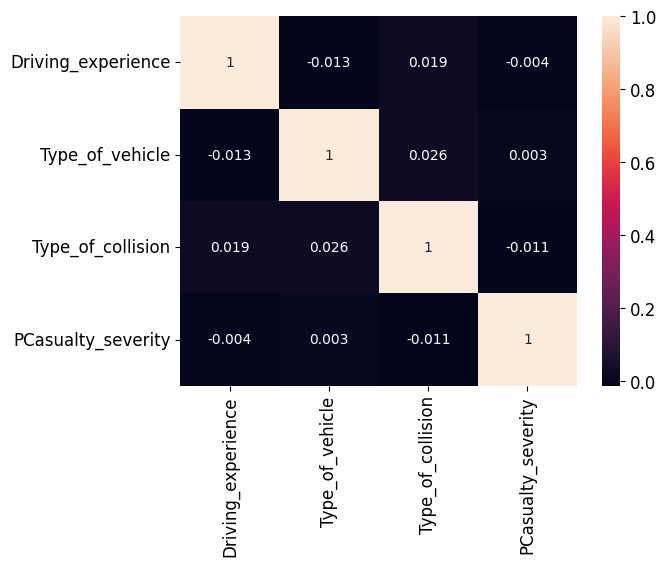

In [144]:
n = df[['Driving_experience','Type_of_vehicle','Type_of_collision','PCasualty_severity']].apply(pd.to_numeric,errors = 'coerce')
corr = n.corr()

sns.heatmap(corr, annot=True)

<ipython-input-145-5ab6a4c084cf>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Age_band_of_driver', y='Number_of_casualties', data=df, palette='Set2')


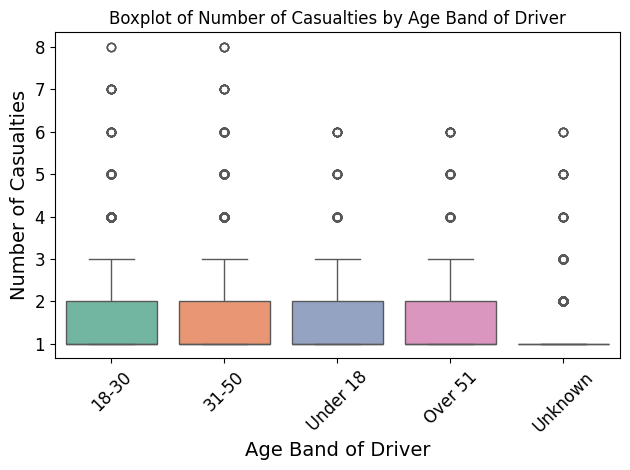

In [145]:
sns.boxplot(x='Age_band_of_driver', y='Number_of_casualties', data=df, palette='Set2')
plt.xlabel('Age Band of Driver')
plt.ylabel('Number of Casualties')
plt.title('Boxplot of Number of Casualties by Age Band of Driver')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: xlabel='Educational_level', ylabel='Type_of_vehicle'>

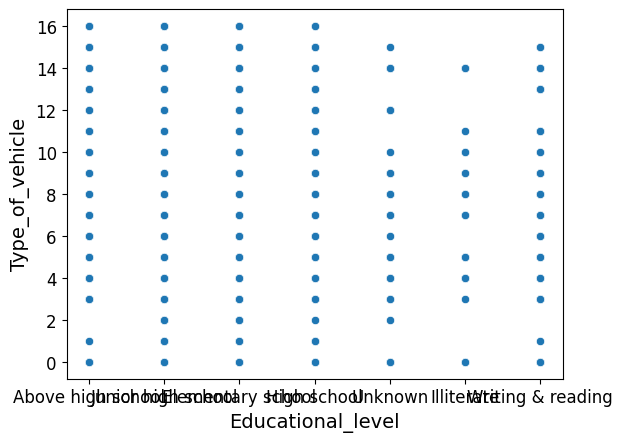

In [146]:
sns.scatterplot(x='Educational_level',y='Type_of_vehicle',data=df)

Histograms.

<Axes: xlabel='Accident_severity', ylabel='Count'>

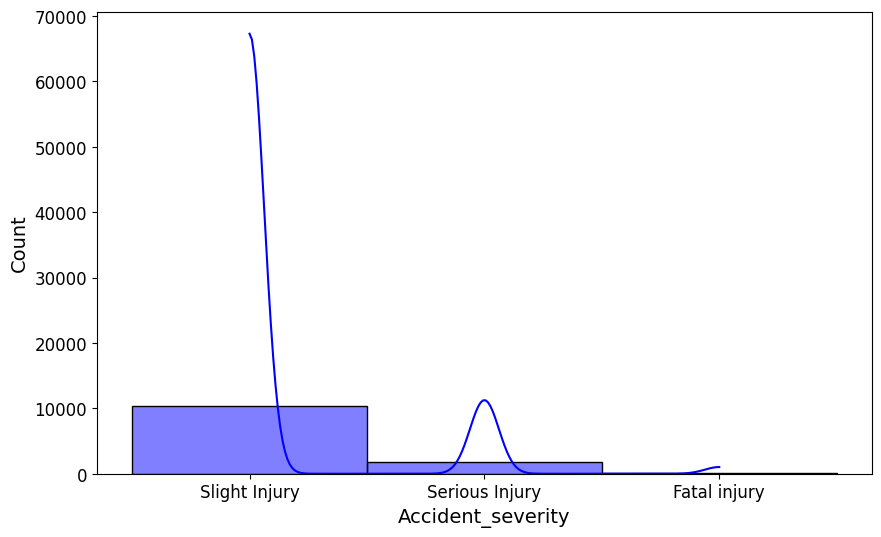

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.histplot(df['Accident_severity'], kde=True, bins=20, color='blue')

<ipython-input-148-90c91bee1771>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Age_band_of_driver',data=df,palette='viridis')


Text(0.5, 1.0, ' distribution of the Age band of driver')

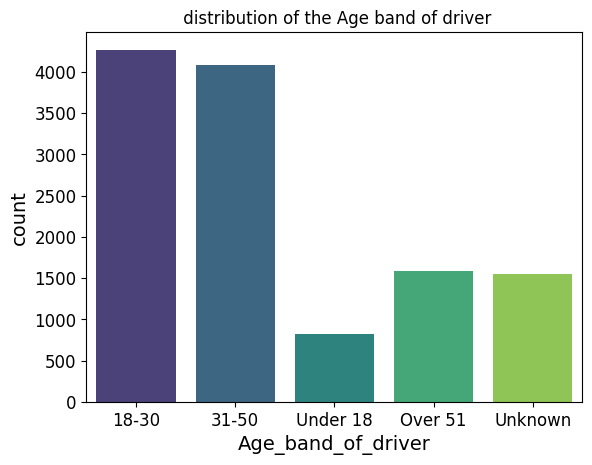

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Age_band_of_driver',data=df,palette='viridis')
plt.title(' distribution of the Age band of driver')

## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

In [180]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Educational_level,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,...,Accident_severity,PCasualty_severity,Sex_of_driver_Female,Sex_of_driver_Male,Sex_of_driver_Unknown,Vehicle_driver_relation_Employee,Vehicle_driver_relation_Other,Vehicle_driver_relation_Owner,Vehicle_driver_relation_Unknown,vehicles_to_casualties_ratio
0,2024-08-01 17:02:00,Monday,18-30,Above high school,1,0,Owner,10,No defect,Residential areas,...,Slight Injury,-1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,2024-08-01 17:02:00,Monday,31-50,Junior high school,10,11,Owner,5,No defect,Office areas,...,Slight Injury,-1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,2024-08-01 17:02:00,Monday,18-30,Junior high school,1,5,Owner,2,No defect,Recreational areas,...,Serious Injury,3.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,2024-08-01 01:06:00,Sunday,18-30,Junior high school,5,11,Governmental,2,No defect,Office areas,...,Slight Injury,3.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,2024-08-01 01:06:00,Sunday,18-30,Junior high school,2,0,Owner,5,No defect,Industrial areas,...,Slight Injury,-1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

In [152]:
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

np.random.seed(42)

#### Logistic Regression

In [177]:
log = LogisticRegression(solver="lbfgs")
log.fit(xtrain, ytrain)

NameError: name 'xtrain' is not defined

#### Decision Tree Classifier

#### Support Vector Machine (SVM)

#### K-Neighbors Classifier

## Model Evaluation

After training your models, it's crucial to evaluate their performance to understand their effectiveness and limitations. This section outlines various techniques and metrics to assess the performance of each model you have implemented.

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

### Implementing Evaluation
- Calculate the metrics listed above using your test data.

## Project Questions:

### Comparative Analysis

- **Compare Metrics**: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.
- **Evaluate Trade-offs**: Discuss the trade-offs you encountered when choosing between models. Consider factors like computational efficiency, ease of implementation, and model interpretability.
- **Justify Your Choice**: After comparing and evaluating, explain why you believe one model is the best choice. Provide a clear rationale based on the performance metrics and trade-offs discussed.
- **Feature Importance**: Identify and discuss the most important features for the best-performing model. How do these features impact the predictions? Use the visualizations you have created to justify your answer if necessary.
- **Model Limitations**: Discuss any limitations you encountered with the models you used. Are there any aspects of the data or the problem that these models do not handle well?
- **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. This could include trying different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here: